In [1]:
import pandas as pd

X_train = pd.read_csv('../data/train.csv')

In [2]:
# 对数据进行概览
X_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# 数据描述
X_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox

# 画箱型图
sns.boxplot(X_train['count'])
plt.show()
# train_df['count']=train_df['count'].apply(lambda x:np.sqrt(x))
# train_df['count']=train_df['count'].apply(lambda x:np.sqrt(x))

<Figure size 640x480 with 1 Axes>

We cannot think of any strong evidence to get rid of outlier data.
> 我们找不到有力的证据来清除异常值

As per Chebychev's rule, 3 std. deviations account for 99% of data. Using this approach, we filter out the rest of the data.
> 根据切比雪夫定理 在平均值3个标准差范围内,有百分之99的数据

In [5]:
def chebychev_normal(df,k):
    mean = np.mean(df)
    std = np.std(df)
    return (df < (mean + k * std)) & (df > (mean - k * std))

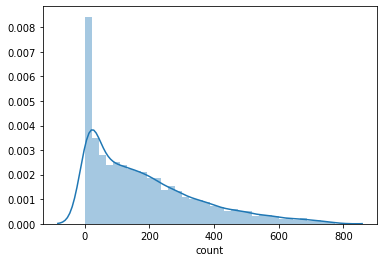

In [6]:
cnt=X_train['count'].values
q99=np.percentile(cnt,[99])

X_train=X_train[X_train['count']<q99[0]]
sns.distplot(X_train['count'])
plt.show()

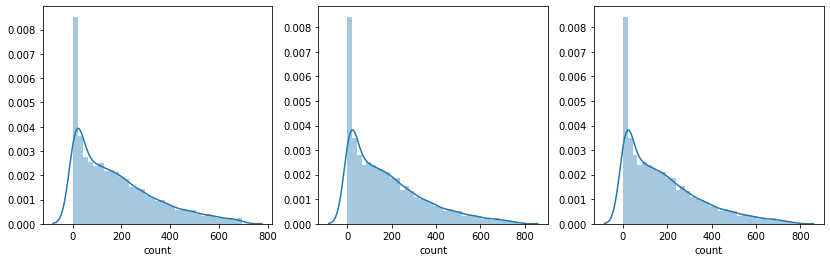

In [7]:
count = X_train['count']
fig = plt.figure(figsize=(14,4))
axes= fig.subplots(1,3)
sns.distplot(count[chebychev_normal(count,3)],ax=axes[0])
sns.distplot(count[chebychev_normal(count,4)],ax=axes[1])
sns.distplot(count[chebychev_normal(count,5)],ax=axes[2])

plt.show()

As this is a highly skewed data, we will try to transform this data using either log, square-root or box-cox  transformation.

> 由于这是一个高度偏斜的数据，因此我们将尝试使用对数，平方根或box-cox转换来转换此数据。

After trying out all three, log square gives the best result. Also as the evaluation metric is NLMSE, using log would help as it would allow to less penalize the large difference in final variable values.

> 在尝试了所有三个之后，对数平方给出最佳结果。同样，由于评估指标为NLMSE，因此使用log会有所帮助，因为它将减少对最终变量值的较大差异的惩罚。

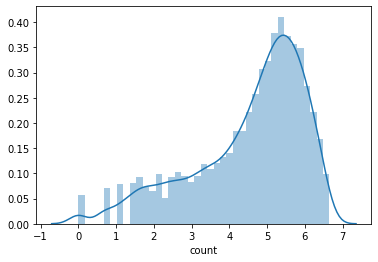

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: count, Length: 10777, dtype: float64


In [8]:
#from scipy.stats import boxcox
X_train['count']=X_train['count'].apply(lambda x:np.log(x))
#train_df['count']=boxcox(train_df['count'])[0]
sns.distplot(X_train['count'])
plt.show()
print (X_train['count'])

Univariate analysis of all variables
Categorical data--> Season, Holiday, WorkingDay, Weather

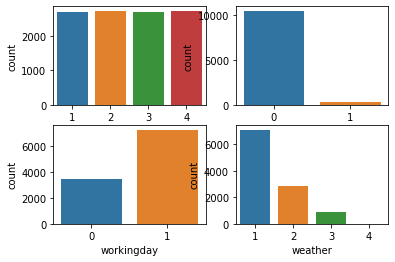

In [9]:
cat_names=['season', 'holiday', 'workingday', 'weather']

i=0
for name in cat_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=train_df) 
    
plt.show()

Univariate analysis for continuous data

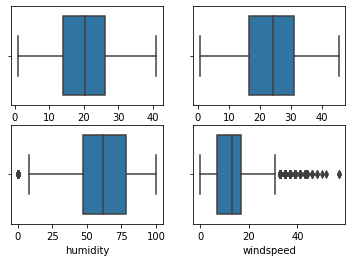

In [10]:
cont_names=['temp','atemp','humidity','windspeed']
        
#sns.boxplot(train_df['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=X_train) 
    
plt.show()

Some of the inferences that can be made:
* Holiday and working day look  somewhat correlated. Can one of them be removed to avoid multi-collinearity?Let's wait until we calculate thier correlation value
* Not much can be inferred from season data. Majority of the data fall under 1 and 2, which is clear skies mist/cloudy.
* Temp, Atemp, humidity look normally distributed. However, windspeed has a lot of outliers which will be analysed further.
* doing a brief time-series analysis to see if there's any improvement in count over a period of time
* moving average to be calculated for a period of 3/4 months as that is the no of months in one season

可以做出的一些推断：
- workingday和holiday看起来有些相关。可以删除其中之一以避免多重共线性吗？我们等到计算相关系数时再来处理这个问题。
- 从season上推断不出什么。多数数据属于1和2，即晴朗的天空薄雾/多云。
- 温度，温度，湿度看起来呈正态分布。但是，风速有很多离群值，将进一步分析。
- 进行简短的时间序列分析，以查看一段时间内count是否有任何improvement。
- 要计算的移动平均值为3/4个月，因为这是一个季节中没有月份的数？


0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10777, dtype: object

datetime
2011-01-01 00:00:00   2011-01-01 00:00:00
2011-01-01 01:00:00   2011-01-01 01:00:00
2011-01-01 02:00:00   2011-01-01 02:00:00
2011-01-01 03:00:00   2011-01-01 03:00:00
2011-01-01 04:00:00   2011-01-01 04:00:00
                              ...        
2012-12-19 19:00:00   2012-12-19 19:00:00
2012-12-19 20:00:00   2012-12-19 20:00:00
2012-12-19 21:00:00   2012-12-19 21:00:00
2012-12-19 22:00:00   2012-12-19 22:00:00
2012-12-19 23:00:00   2012-12-19 23:00:00
Name: datetime, Length: 10777, dtype: datetime64[ns]

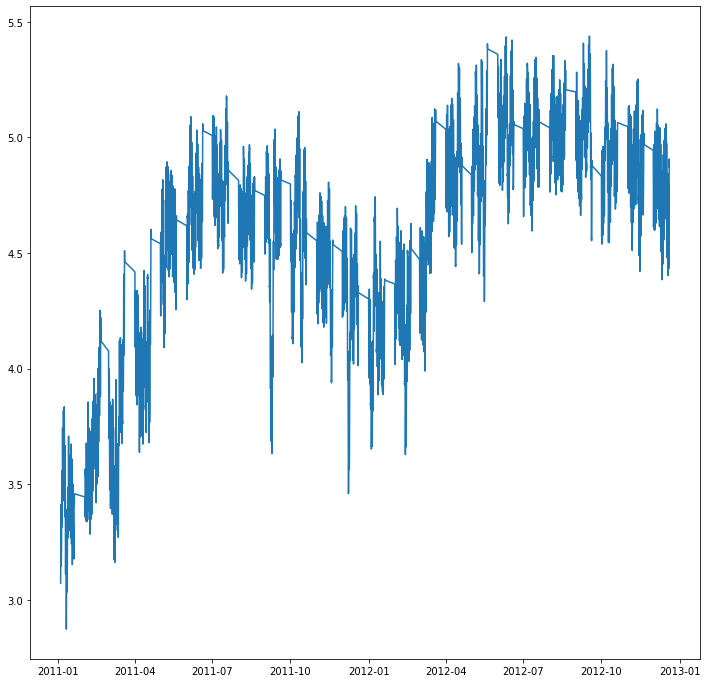

4953

In [17]:
from datetime import datetime
import gc

display(X_train['datetime'])
X_train_cop = X_train.copy()
X_train_cop['datetime'] = X_train_cop['datetime'].apply(lambda x:datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'))
time_series_df= X_train_cop
time_series_df.index=X_train_cop['datetime']
display(time_series_df['datetime'])

import matplotlib.pyplot as plt

#Applying rolling average on a period of 60 days, as the typical weather lasts for around 3 months (20 days in training data of each month)
plt.figure(figsize=(12,12))
plt.plot(time_series_df[['datetime','count']].rolling(60)['count'].mean())
plt.show()

del time_series_df
del X_train_cop
gc.collect()

As expected the total count grows over a period of time following an increasing cyclic pattern, therefore the model needs to incorporate changes in seasonality too, for which we would be using the month and year variables.

>正如预期的那样，总数量会随着周期模式的增加而在一段时间内增长，因此该模型也需要考虑季节性变化，为此我们将使用月份和年份变量。

Biivariate analysis on continuous data

>连续数据的双变量分析

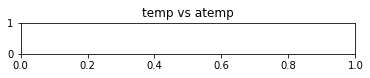

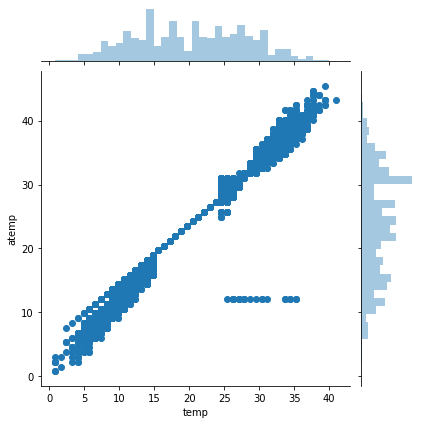

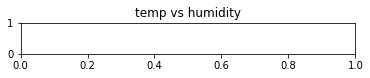

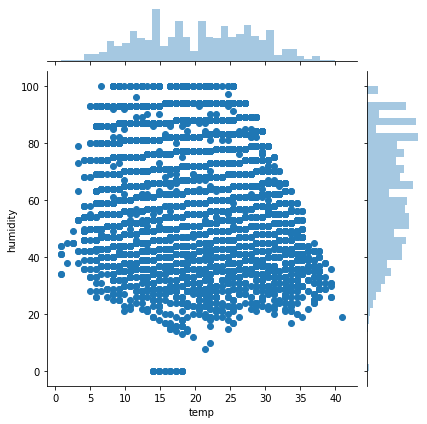

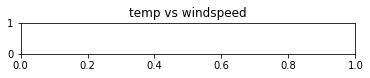

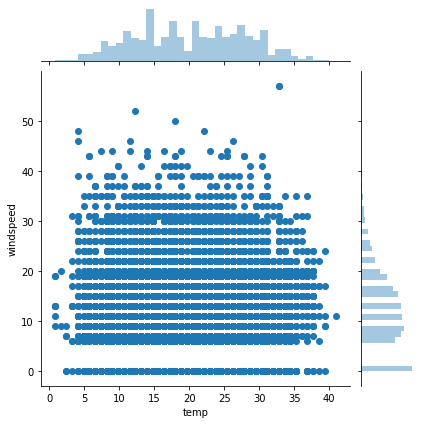

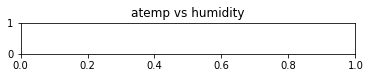

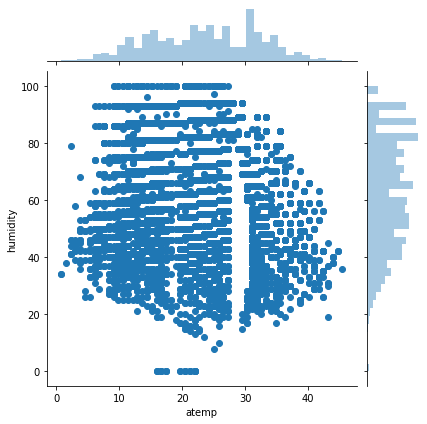

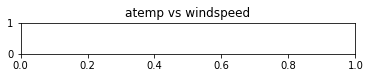

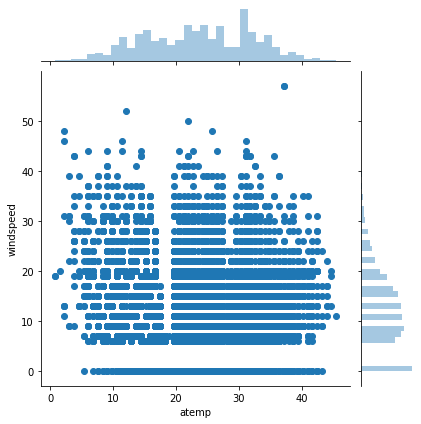

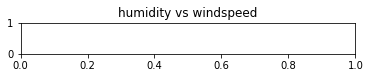

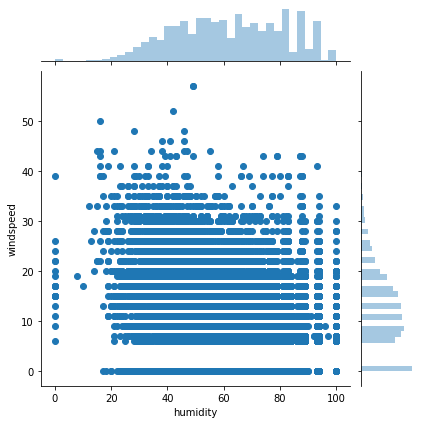

In [20]:
i=1
for name_1 in cont_names:
    j=cont_names.index(name_1) # col index 

    while(j<len(cont_names)-1):
        ax = plt.subplot(6,1,i) # 6 rows 1 cols 
        ax.set_title(name_1+' vs '+cont_names[j+1])
        sns.jointplot(x=name_1,y=cont_names[j+1],data=X_train) 
        j=j+1
        i=i+1
        plt.show()

Not much can be inferred about the distribution of these variables except for variable 'temp' and 'atemp' that almost have

> 除了变量“ temp”和“ atemp”几乎具有相似的上下文外，无法推断出这些变量的分布情况。

similar context. We would be using the 'temp' and getting rid of the 'atemp' variables for better precision value and avoiding multi-collinearity.

> 我们将使用'temp'并摆脱'atemp'变量以获得更好的精度值并避免多重共线性。

Let us perfrom some feature engineering. The datetime column can be used to extract data like the month, day, hour which can be used in our model for making better predictions.

> 让我们设计一些特征工程。datetime列可用于提取月，日，小时等数据，这些数据可在我们的模型中用于做出更好的预测。

In [21]:
from datetime import datetime

#converting string dattime to datetime

X_train['datetime']=X_train['datetime'].apply(lambda x:datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'))

new_df=X_train

new_df['month']=new_df['datetime'].apply(lambda x:x.month)
new_df['hour']=new_df['datetime'].apply(lambda x:x.hour)
new_df['day']=new_df['datetime'].apply(lambda x:x.day)
new_df['year']=new_df['datetime'].apply(lambda x:x.year)
#new_df['weekday_flag']=new_df['datetime'].apply(weekday_flag)
new_df['mnth+day']=new_df['datetime'].apply(lambda x:str(x.month)+'_'+str(x.day))


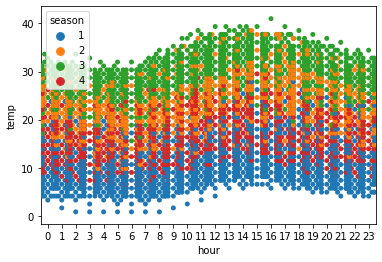

In [22]:
sns.swarmplot(x='hour',y='temp',data=new_df,hue='season')
plt.show()

A non-linear relationship between temperature and day of the hour according to different seasons is evident from this chart.

> 从该图表可以明显看出，温度与一天中不同季节的一天之间存在非线性关系。

Feature engineering to create bins on an hourly basis.

> 特征工程：以每小时为单位创建bins

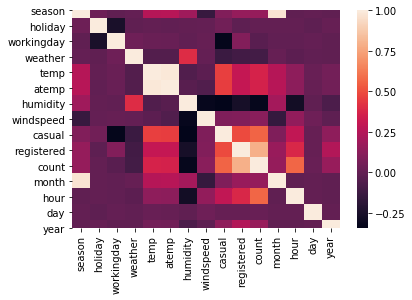

In [23]:
new_df.cov()
sns.heatmap(new_df.corr())
plt.show()

A lot of inferences that we have already covered could be verified using the following heatmap

> 我们上面的很多推论都可以用 heatmap来验证

In [24]:
new_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
season,1.000000,0.030145,-0.010817,0.008974,0.258755,0.264946,0.192384,-0.147584,0.094874,0.160850,0.157441,0.971723,-0.008572,0.001907,-0.008825
holiday,0.030145,1.000000,-0.249987,-0.007546,0.002004,-0.003614,0.000788,0.008659,0.046419,-0.015456,0.002128,0.002389,0.000935,-0.015656,0.013820
workingday,-0.010817,-0.249987,1.000000,0.035943,0.023581,0.018510,-0.006626,0.012621,-0.330633,0.101270,-0.028357,-0.005883,-0.002239,0.008881,-0.009251
weather,0.008974,-0.007546,0.035943,1.000000,-0.052743,-0.053423,0.405825,0.007399,-0.134227,-0.108182,-0.103790,0.012510,-0.020862,-0.006143,-0.010069
temp,0.258755,0.002004,0.023581,-0.052743,1.000000,0.985282,-0.058217,-0.019430,0.461425,0.307082,0.365795,0.257081,0.138337,0.014515,0.051975
atemp,0.264946,-0.003614,0.018510,-0.053423,0.985282,1.000000,-0.037285,-0.059061,0.457020,0.304222,0.361851,0.263763,0.133509,0.011276,0.049660
humidity,0.192384,0.000788,-0.006626,0.405825,-0.058217,-0.037285,1.000000,-0.319597,-0.342272,-0.262680,-0.323366,0.206496,-0.274304,-0.008549,-0.072691
windspeed,-0.147584,0.008659,0.012621,0.007399,-0.019430,-0.059061,-0.319597,1.000000,0.091620,0.094089,0.120141,-0.151158,0.146080,0.035797,-0.016638
casual,0.094874,0.046419,-0.330633,-0.134227,0.461425,0.457020,-0.342272,0.091620,1.000000,0.495236,0.562300,0.090319,0.295752,0.011213,0.134985
registered,0.160850,-0.015456,0.101270,-0.108182,0.307082,0.304222,-0.262680,0.094089,0.495236,1.000000,0.792261,0.167515,0.383665,0.013990,0.245989


A lot of inferences that we have already hypothesised could be verified using the following heatmap and correlation matrix.

> 我们可以通过heatmap来验证特征间的关系.

Visualizing multi-variate distribution of target variable with other categorical data.

> 可视化目标变量与其他离散特征的多元分布。

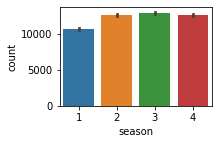

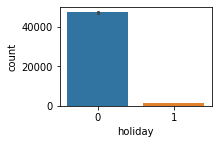

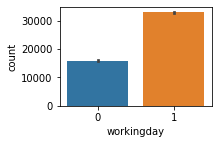

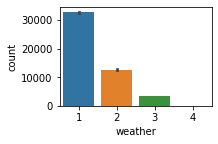

In [25]:
cat_names=['season', 'holiday', 'workingday', 'weather']
i=1
for name in cat_names:
    plt.subplot(2,2,i)
    sns.barplot(x=name ,y='count' ,data=new_df ,estimator=sum)
    i=i+1
    plt.show()

- With weather 1,2 and season 2,3 and working days the bicycle rental count is maximum.
- 在天气1,2和季节2,3以及工作日中，自行车出租数量最多。

- As per the analysis, we need to get rid off these variables to be inputted in our model:season. Working day has better correlation with count, weather,working day, hour,year has to be label encoded
- 根据分析，我们需要去掉这些要输入到我们的模型中的变量:season。工作日与计数、天气、工作日、小时、年有较好的相关性，需要对其进行encoded.

In [26]:
final_df=new_df.drop(['datetime','temp','windspeed','casual','registered','mnth+day','day'], axis=1)
final_df.head()

,season,holiday,workingday,weather,atemp,humidity,count,month,hour,year
0,1,0,0,1,14.395,81,2.772589,1,0,2011
1,1,0,0,1,13.635,80,3.688879,1,1,2011
2,1,0,0,1,13.635,80,3.465736,1,2,2011
3,1,0,0,1,14.395,75,2.564949,1,3,2011
4,1,0,0,1,14.395,75,0.000000,1,4,2011


Adding dummy varibles to categorical data

> 将离散变量one-hot

In [27]:
weather_df=pd.get_dummies(new_df['weather'],prefix='w',drop_first=True)
year_df=pd.get_dummies(new_df['year'],prefix='y',drop_first=True)
month_df=pd.get_dummies(new_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(new_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(new_df['season'],prefix='s',drop_first=True)

final_df=final_df.join(weather_df)
final_df=final_df.join(year_df)
final_df=final_df.join(month_df)                     
final_df=final_df.join(hour_df)
final_df=final_df.join(season_df)
                     
final_df.head()

,season,holiday,workingday,weather,atemp,humidity,count,month,hour,year,...,h_17,h_18,h_19,h_20,h_21,h_22,h_23,s_2,s_3,s_4
0,1,0,0,1,14.395,81,2.772589,1,0,2011,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,13.635,80,3.688879,1,1,2011,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,13.635,80,3.465736,1,2,2011,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,14.395,75,2.564949,1,3,2011,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,14.395,75,0.000000,1,4,2011,...,0,0,0,0,0,0,0,0,0,0


In [28]:
final_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'count', 'month', 'hour', 'year', 'w_2', 'w_3', 'w_4', 'y_2012', 'm_2',
       'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
       'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10',
       'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19',
       'h_20', 'h_21', 'h_22', 'h_23', 's_2', 's_3', 's_4'],
      dtype='object')

Now that we have got our guns lock and loaded, it's time to shoot.
lets begin the modelling process.


In [29]:
X = final_df.iloc[: , final_df.columns != 'count'].values
print(X)

Y = final_df.iloc[:,6].values

print(Y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 1. ... 0. 0. 1.]
 [4. 0. 1. ... 0. 0. 1.]
 [4. 0. 1. ... 0. 0. 1.]]
[2.77258872 3.68887945 3.4657359  ... 5.12396398 4.8598124  4.47733681]


**Choosing the appropriate model for regression**
After trying multiple linear regression, poly linear regression, SVR, Decision Tree regression and RF regression,XGRegressor
Out of these, we would be choosing the one having the best accuracy and applying GridSearchCV for optimal hyperparmater tuning. XGBoost gives the maximum accuracy of R2 square (92.5%)

选择合适的回归模型在尝试了多元线性回归，多线性回归，SVR，决策树回归和RF回归，XGRegressor之后，我们将选择精度最高的模型，并应用GridSearchCV进行最佳超参数调整。 XGBoost给出R2平方的最大精度（92.5％）

In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

def grid_search():
    print('lets go')

    xgr=xgb.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4)
    xgr.fit(X,Y)

    #rf=RandomForestRegressor(n_estimators=100,random_state=0)
    #rf.fit(X,Y)

    #parameters=[{'max_depth':[8,9,10,11,12],'min_child_weight':[4,5,6,7,8]}]
    #parameters=[{'gamma':[i/10.0 for i in range(0,5)]}]
    parameters=[{'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]}]

    grid_search= GridSearchCV(estimator=xgr, param_grid=parameters, cv=10,n_jobs=-1)

    print (1)
    grid_search=grid_search.fit(X,Y)
    print (2)
    best_accuracy=grid_search.best_score_
    best_parameters=grid_search.best_params_
    print (best_accuracy)
    print (best_parameters)

#if __name__ == '__main__':
   #grid_search()

Grid search gives best accuracy for max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.6,subsample=0.6
Training the model again with these new parameters.

> 在max_depth=8，min_child_weight=6,gamma=0.4,colsample bytree=0.6,subsample=0.6的情况下，使用这些新参数对模型进行再次训练，网格搜索的准确性最佳。

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X,Y)
imp_list=rf.feature_importances_
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(final_df.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

In [32]:
import operator
sorted_x = sorted(feats.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_x)

[('month', 0.6845749061301917), ('atemp', 0.05701326543862303), ('workingday', 0.055727100529676506), ('count', 0.03269338883613693), ('humidity', 0.02633731785390779), ('h_3', 0.016417929996883893), ('w_4', 0.016348651953865964), ('hour', 0.014186189494841003), ('season', 0.012307110433862498), ('h_5', 0.011609062709718097), ('h_2', 0.011365861410205071), ('h_4', 0.00963519396259326), ('weather', 0.006638598428846934), ('h_1', 0.005382205426979104), ('w_2', 0.004741005105013636), ('h_7', 0.004174425908351823), ('m_12', 0.003290417325810907), ('h_6', 0.003194373533786841), ('holiday', 0.0023340804486995945), ('h_16', 0.0020698045326348197), ('h_17', 0.001546297395890107), ('year', 0.0014429796520640341), ('h_9', 0.001190916539194753), ('h_22', 0.000989893489605909), ('m_3', 0.0009636193407063756), ('y_2012', 0.0009217454281715793), ('m_2', 0.0008244098677989797), ('m_9', 0.0008140314758397035), ('m_4', 0.000795292423462362), ('h_8', 0.0007788954966585206), ('m_8', 0.000751414070272182)

In [33]:
import xgboost as xg
xgr=xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.6,subsample=0.6)
xgr.fit(X,Y)

[22:00:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=6, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

Using the same pre-processing functions on the test data:

In [ ]:


new_df=pd.read_csv('../input/test.csv')
new_df['datetime']=new_df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


new_df['month']=new_df['datetime'].apply(lambda x:x.month)
new_df['hour']=new_df['datetime'].apply(lambda x:x.hour)
new_df['day']=new_df['datetime'].apply(lambda x:x.day)
new_df['year']=new_df['datetime'].apply(lambda x:x.year)
#new_df['weekday_flag']=new_df['datetime'].apply(weekday_flag)
#new_df['mnth+day']=new_df['datetime'].apply(lambda x:str(x.month)+'_'+str(x.day))

print (new_df.head())



In [ ]:

new_df=new_df.drop(['datetime','temp','windspeed','day'], axis=1)
new_df.head()

In [ ]:
#adding dummy varibles to categorical variables
weather_df=pd.get_dummies(new_df['weather'],prefix='w',drop_first=True)
yr_df=pd.get_dummies(new_df['year'],prefix='y',drop_first=True)
month_df=pd.get_dummies(new_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(new_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(new_df['season'],prefix='s',drop_first=True)


new_df=new_df.join(weather_df)
new_df=new_df.join(yr_df)
new_df=new_df.join(month_df)                     
new_df=new_df.join(hour_df)
new_df=new_df.join(season_df)
                     
new_df.head()

In [ ]:
X_test=new_df.iloc[:,:].values
X_test.shape
#print (new_df.columns)


Using the XGBoost Regressor for predictions:

In [ ]:
#def invboxcox(y):
#    return(np.exp(np.log(0.69*y+1)/0.69))

In [ ]:
y_output=xgr.predict(X_test)
y_output




op=pd.DataFrame({'count':np.exp(y_output)})
op.to_csv('sub1.csv')


In [ ]:
print (np.exp(y_output))